<a href="https://colab.research.google.com/github/Gkemhcs/deeplearning-pytorch-notebooks/blob/main/cnn_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
! pip install torchvision torchmetrics torch

In [26]:
import torchvision ,torch
import torchvision.transforms.v2 as T
import matplotlib.pyplot as plt

In [19]:
toTensor = T.Compose([T.ToImage(), T.ToDtype(torch.float32, scale=True)])
train_dataset=torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=toTensor)
test_and_valid_dataset=torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=toTensor)

In [11]:
train_dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
                 ToImage()
                 ToDtype(scale=True)
           )

In [21]:
len(test_dataset)

5000

In [20]:
test_dataset,valid_dataset=torch.utils.data.random_split(test_and_valid_dataset, [5000, 5000])


In [22]:
train_dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [24]:
train_dataset[0][1]

6

In [25]:
torch.manual_seed(42)

In [29]:

grid_size=4
def plot_images_and_labels(dataset):
    num_images = grid_size * grid_size
    indices = torch.randperm(len(dataset))[:num_images]

    images, labels = zip(*[dataset[i] for i in indices])

    fig, axes = plt.subplots(grid_size, grid_size, figsize=(grid_size, grid_size))

    for i, ax in enumerate(axes.flat):
        img = images[i].permute(1, 2, 0).numpy()  # C,H,W -> H,W,C
        ax.imshow(img)
        ax.set_title(dataset.classes[labels[i]], fontsize=8)
        ax.axis('off')

    plt.tight_layout()

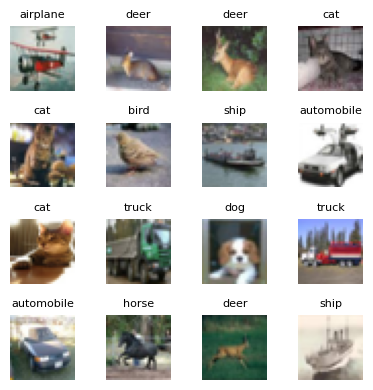

In [30]:
plot_images_and_labels(train_dataset)

In [33]:
train_dataset[0][0].shape

torch.Size([3, 32, 32])

In [35]:
from PIL import Image

In [38]:
!curl -o truck.webp https://image.made-in-china.com/2f0j00pAeoRtrGRQcT/5-7-Ton-Light-Hand-Drive-Lorry-Box-Truck-Isu-Zu-Small-Cargo-Trucks.webp

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 31800  100 31800    0     0   215k      0 --:--:-- --:--:-- --:--:--  215k


In [39]:
truck_img=Image.open('truck.webp')

In [44]:
type(truck_img)

PIL.WebPImagePlugin.WebPImageFile

In [46]:
comp=T.Compose([T.ToImage(), T.ToDtype(torch.float32, scale=True)])
truck_im=comp(truck_img)

In [49]:
truck_im.shape

torch.Size([3, 800, 800])

In [57]:
resizes_truck=T.Resize((32,32))(truck_im)

In [58]:
resizes_truck.shape

torch.Size([3, 32, 32])

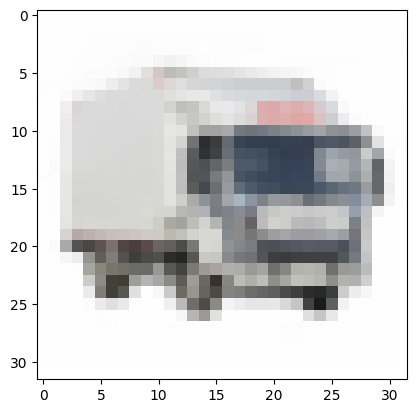

In [60]:
plt.imshow(resizes_truck.permute(1,2,0))

In [75]:
train_dataset=torchvision.datasets.OxfordIIITPet(root="./pets",download=True,split="trainval",target_types="category",transform=toTensor)

In [76]:
test_dataset=torchvision.datasets.OxfordIIITPet(root="./pets",download=True,split="test",target_types="category",transform=toTensor)

In [71]:
valid_datasdet,test_dataset=torch.utils.data.random_split(test_dataset, [2000,1669])

In [72]:
len(test_dataset)

1669

In [81]:
classes=train_dataset.classes

In [77]:
train_dataset[0]

(Image([[[0.1451, 0.1373, 0.1412,  ..., 0.9686, 0.9765, 0.9765],
         [0.1373, 0.1373, 0.1451,  ..., 0.9647, 0.9725, 0.9765],
         [0.1373, 0.1412, 0.1529,  ..., 0.9686, 0.9804, 0.9804],
         ...,
         [0.0196, 0.0157, 0.0157,  ..., 0.2863, 0.2471, 0.2706],
         [0.0157, 0.0118, 0.0118,  ..., 0.2392, 0.2157, 0.2510],
         [0.1098, 0.1098, 0.1059,  ..., 0.2314, 0.2549, 0.2980]],
 
        [[0.0784, 0.0706, 0.0745,  ..., 0.9725, 0.9725, 0.9725],
         [0.0706, 0.0706, 0.0784,  ..., 0.9686, 0.9686, 0.9725],
         [0.0706, 0.0745, 0.0863,  ..., 0.9647, 0.9765, 0.9765],
         ...,
         [0.0235, 0.0196, 0.0196,  ..., 0.4627, 0.4039, 0.4314],
         [0.0118, 0.0078, 0.0078,  ..., 0.3882, 0.3843, 0.4235],
         [0.1059, 0.1059, 0.1059,  ..., 0.3686, 0.4157, 0.4588]],
 
        [[0.0471, 0.0392, 0.0431,  ..., 0.9922, 0.9922, 0.9922],
         [0.0392, 0.0392, 0.0471,  ..., 0.9843, 0.9882, 0.9922],
         [0.0392, 0.0431, 0.0549,  ..., 0.9843, 0.9961, 

In [86]:
grid_size=4
def plot_images_and_labels(dataset):
    num_images = grid_size * grid_size
    indices = torch.randperm(len(dataset))[:num_images]

    images, labels = zip(*[dataset[i] for i in indices])

    fig, axes = plt.subplots(grid_size, grid_size, figsize=(grid_size*2.5, grid_size*2.5))

    for i, ax in enumerate(axes.flat):
        img = images[i].permute(1, 2, 0).numpy()  # C,H,W -> H,W,C
        ax.imshow(img)
        ax.set_title(dataset.classes[labels[i]], fontsize=8)
        ax.axis('off')

    plt.tight_layout()

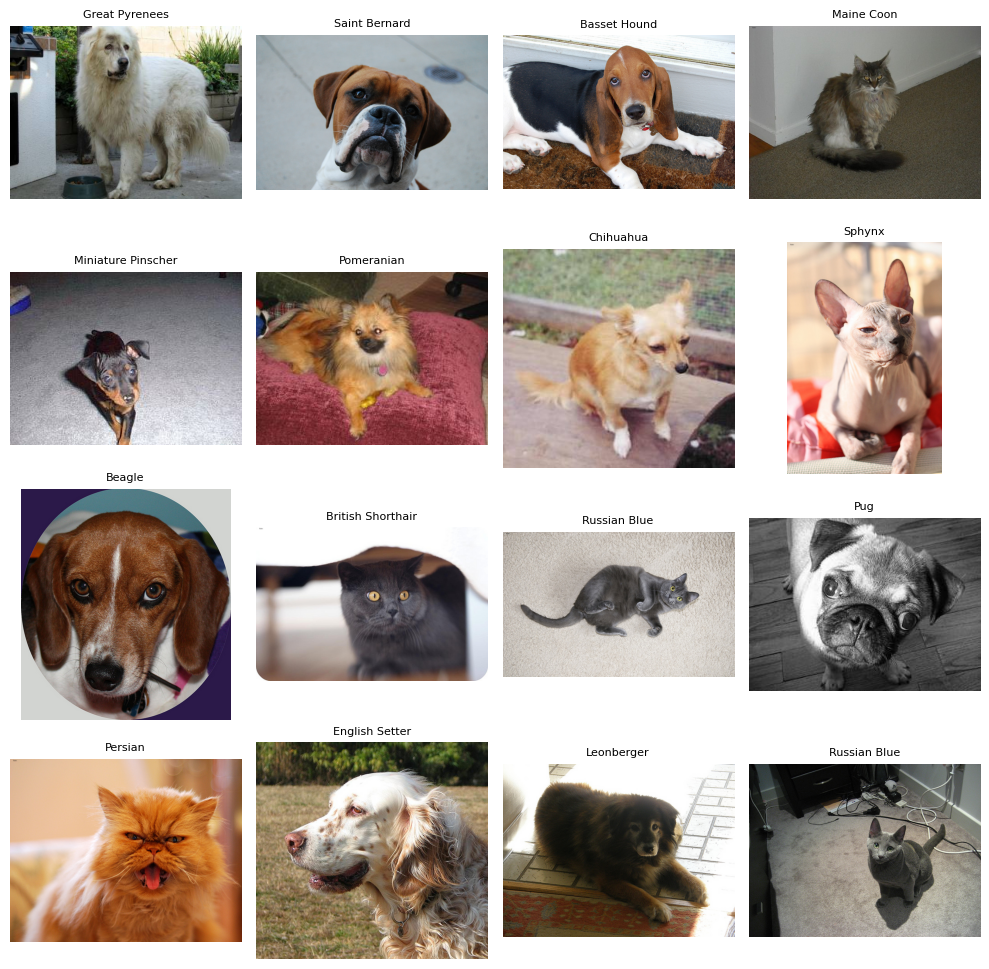

In [87]:
plot_images_and_labels(train_dataset)

In [85]:
train_dataset[0][0].shape

torch.Size([3, 500, 394])

(np.float64(-0.5), np.float64(393.5), np.float64(499.5), np.float64(-0.5))

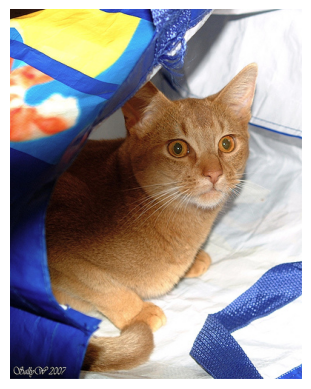

In [92]:
plt.imshow(train_dataset[0][0].permute(1,2,0))
plt.axis("off")

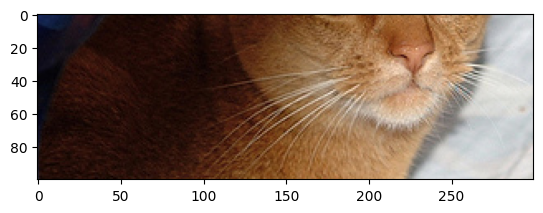

In [99]:
centered_img=T.CenterCrop([100,300])(train_dataset[0][0])
plt.imshow(centered_img.permute(1,2,0))

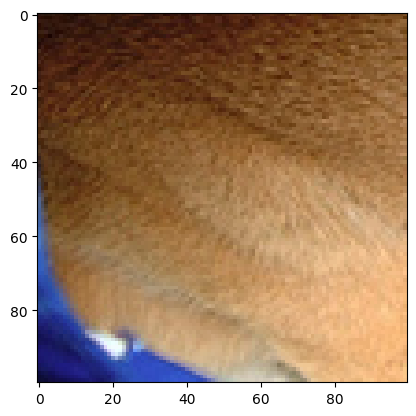

In [106]:
random_crop=T.RandomCrop([100,100])(train_dataset[0][0])
plt.imshow(random_crop.permute(1,2,0))

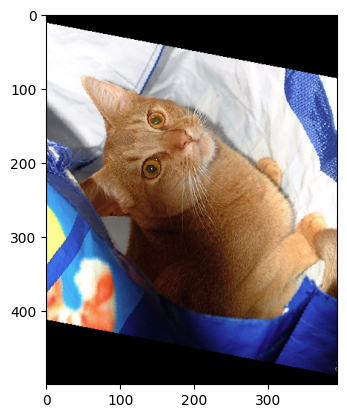

In [110]:
r_r=T.RandomRotation(degrees=90)(train_dataset[0][0])
plt.imshow(r_r.permute(1,2,0))

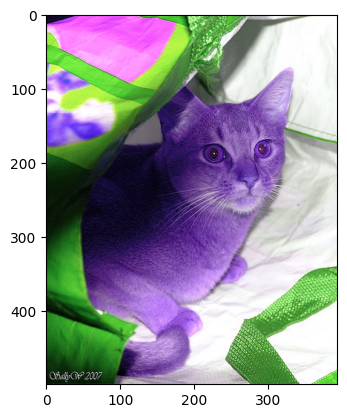

In [115]:
chan_ch=T.RandomChannelPermutation()(train_dataset[0][0])
plt.imshow(chan_ch.permute(1,2,0))


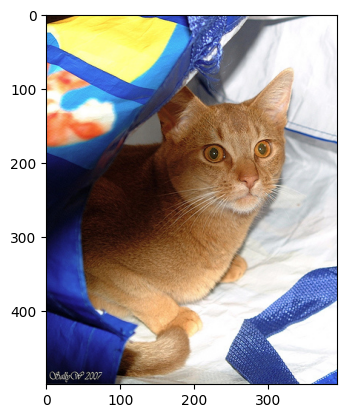

In [122]:
zoom_img=T.RandomZoomOut()(train_dataset[0][0])
plt.imshow(zoom_img.permute(1,2,0))

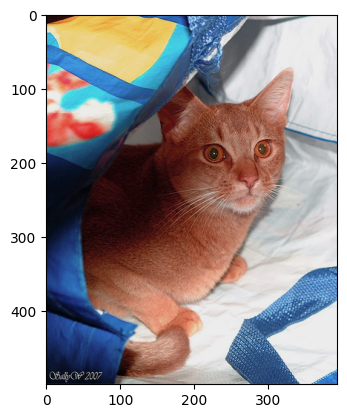

In [130]:
distort=T.RandomPhotometricDistort()(train_dataset[0][0])
plt.imshow(distort.permute(1,2,0))

In [133]:
train_dataset[0][0].shape

torch.Size([3, 500, 394])